## Module 1 Homework

In this homework, we're going to download finance data from various sources and make simple calculations/analysis.

In [83]:
# install main library YFinance
%%capture
!pip install yfinance

In [84]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt

#YahooFinance
import yfinance as yf

import time
from datetime import date

### Question 1: [Macro] Average growth of GDP in 2023

**What is the average growth (in %) of GDP in 2023?**

Download the timeseries Real Gross Domestic Product (GDPC1) from FRED (https://fred.stlouisfed.org/series/GDPC1).
Calculate year-over-year (YoY) growth rate (that is, divide current value to one 4 quarters ago). Find the average YoY growth in 2023 (average from 4 YoY numbers).
Round to 1 digit after the decimal point: e.g. if you get 5.66% growth => you should answer  5.7

In [5]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-2, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=24
Period for indexes: 2022-04-24 to 2024-04-24 


In [6]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPC1
gdppot = pdr.DataReader("GDPC1", "fred", start=start)

In [85]:
gdppot['gdppot_us_yoy'] = gdppot.GDPC1/gdppot.GDPC1.shift(4)-1
gdppot['gdppot_us_qoq'] = gdppot.GDPC1/gdppot.GDPC1.shift(1)-1
gdppot['gdppot_us_yoy'].tail()

DATE
2022-10-01         NaN
2023-01-01         NaN
2023-04-01         NaN
2023-07-01    0.029269
2023-10-01    0.031345
Name: gdppot_us_yoy, dtype: float64



> The average growth of GDP in 2023 is **3.1%**



### Question 2. [Macro] Inverse "Treasury Yield"

**Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.**


Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2,
 https://fred.stlouisfed.org/series/DGS10). Join them together to one dataframe on date (you might need to read about pandas.DataFrame.join()), calculate the difference dgs10-dgs2 daily.

(Additional: think about what does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?)

In [16]:
start = date(2000, 1, 1)

# https://fred.stlouisfed.org/series/DGS5
dgs2 = pdr.DataReader("DGS2", "fred", start=start)
dgs10 = pdr.DataReader("DGS10", "fred", start=start)

# Merge the two DataFrames on the date index
merged_data = dgs2.merge(dgs10, left_index=True, right_index=True)

# Calculate the daily difference between DGS10 and DGS2
merged_data['daily_difference'] = merged_data['DGS10'] - merged_data['DGS2']

merged_data['daily_difference'].min()

-1.0800000000000005

> The min value of (dgs10-dgs2) after since year 2000 is **-1.1**


### Question 3. [Index] Which Index is better recently?

**Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)**

Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/). Compare 5Y growth for both (between 2019-04-09 and 2024-04-09). Select the higher growing index and write down the growth in % (closest integer %). E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write down 109 as your answer.

(Additional: think of other indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?)

In [82]:
# Define start and end dates for the 5-year period
start_date = date(2019, 4, 9)
end_date = date(2024, 4, 9)

# Download data for S&P 500 (^GSPC) and IPC Mexico (^MXX) from Yahoo Finance
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)
ipc_data = yf.download('^MXX', start=start_date, end=end_date)

# Calculate the 5-year growth for both indices
sp500_growth = (sp500_data['Adj Close'][-1] / sp500_data['Adj Close'][0] - 1) * 100
ipc_growth = (ipc_data['Adj Close'][-1] / ipc_data['Adj Close'][0] - 1) * 100

# Select the higher growing index
if sp500_growth > ipc_growth:
    higher_growing_index = 'S&P 500'
    growth = round(sp500_growth)
else:
    higher_growing_index = 'IPC Mexico'
    growth = round(ipc_growth)

print(higher_growing_index)
print(growth)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

S&P 500
81


> The higher growing index between S&P 500 and IPC Mexico is **S&P 500** with a growth of **81%** over the last 5 years





### Question 4. [Stocks OHLCV] 52-weeks range ratio (2023) for the selected stocks


**Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023**


Download the 2023 daily OHLCV data on Yahoo Finance for top6 stocks on earnings (https://companiesmarketcap.com/most-profitable-companies/): 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM.

Here is the example data you should see in Pandas for "2222.SR": https://finance.yahoo.com/quote/2222.SR/history

Calculate maximum-minimim "Adj.Close" price for each stock and divide it by the maximum "Adj.Close" value.
Round the result to two decimal places (e.g. 0.1575 will be 0.16)

(Additional: why this may be important for your research?)

In [28]:
# Define the list of stock symbols
stock_symbols = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

# Download daily OHLCV data for each stock
data = yf.download(stock_symbols, start='2023-01-01', end='2023-12-31')

# Calculate maximum-minimum "Adj.Close" price ratio for each stock
results = {}
for stock_symbol in stock_symbols:
    max_close = data['Adj Close'][stock_symbol].max()
    min_close = data['Adj Close'][stock_symbol].min()
    ratio = (max_close - min_close) / max_close
    results[stock_symbol] = round(ratio, 2)

print("Maximum-Minimum Adj.Close price ratio for each stock:")
for stock_symbol, ratio in results.items():
    print(f"{stock_symbol}: {ratio}")

[*********************100%%**********************]  6 of 6 completed

Maximum-Minimum Adj.Close price ratio for each stock:
2222.SR: 0.21
BRK-B: 0.21
AAPL: 0.37
MSFT: 0.42
GOOG: 0.39
JPM: 0.28


> The largest range ratio of Adj.Close prices in 2023 is **0.42 (MSFT)**



### Question 5. [Stocks] Dividend Yield
**Find the largest dividend yield for the same set of stocks**

Use the same list of companies (2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM) and download all dividends paid in 2023.
You can use `get_actions()` method or `.dividends` field in yfinance library (https://github.com/ranaroussi/yfinance?tab=readme-ov-file#quick-start)

Sum up all dividends paid in 2023 per company and divide each value by the closing price (Adj.Close) at the last trading day of the year.

Find the maximum value in % and round to 1 digit after the decimal point. (E.g., if you obtained USD 1.25 dividends paid and the end year stock price is $100, the dividend yield is 1.25% -- and your answer should be equal to 1.3)

In [41]:
# Download dividends paid in 2023 for each stock
dividends = {}
for stock_symbol in stock_symbols:
    stock = yf.Ticker(stock_symbol)
    div = stock.dividends
    dividends[stock_symbol] = div[(div.index >= "2023-01-01") & (div.index <= "2023-12-31")]

# Calculate the total dividends paid in 2023 per company
total_dividends = {}
for stock_symbol, div in dividends.items():
    total_dividends[stock_symbol] = div.sum()

# Get the closing price (Adj.Close) at the last trading day of the year for each company
closing_prices = {}
for stock_symbol in stock_symbols:
    data = yf.download(stock_symbol, start="2023-01-01", end="2023-12-31")
    closing_prices[stock_symbol] = data['Adj Close'].iloc[-1]


# Calculate the dividend yield for each company
dividend_yield = {}
for stock_symbol in stock_symbols:
    dividend_yield[stock_symbol] = (total_dividends[stock_symbol] / closing_prices[stock_symbol]) * 100

# Find the maximum dividend yield and round to 1 decimal place
max_yield = max(dividend_yield.values())
max_yield_rounded = round(max_yield, 1)

dividend_yield

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


{'2222.SR': 2.770149819503256,
 'BRK-B': 0.0,
 'AAPL': 0.4940592304162832,
 'MSFT': 0.7433143940964608,
 'GOOG': 0.0,
 'JPM': 2.4096079718909573}

> Investment in **Saudi Arabian Oil Company (2222.SR)** has provided the best yield in terms of dividends in 2023 with **2.8%**



### Question 6. [Exploratory] Investigate new metrics

**Free text answer**

Download and explore a few additional metrics or time series that might be valuable for your project and write down why (briefly).

<Axes: title={'center': "MSFT's etf stock price"}>

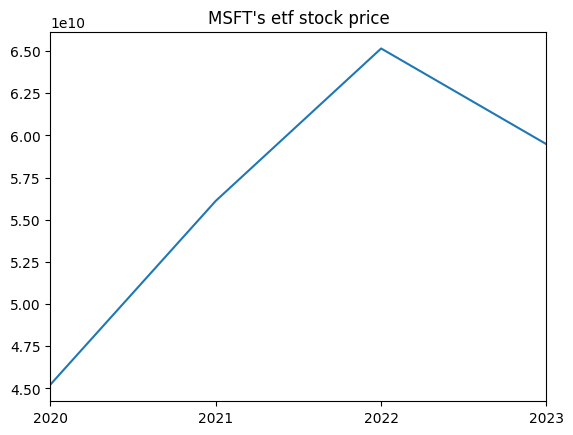

In [80]:
#Define ticker
ticker = "MSFT"

# Download ticker data
stock_symbol = yf.Ticker(ticker)

free_cashflow_data = stock_symbol.cashflow.iloc[0]

# Plot cash flow data
free_cashflow_data.plot(title=f"{ticker}'s etf stock price")

> As earnings include non-cash expenses (like depreciation), I'd prefer **FCF** over earnings, because it reflects the actual cash generated by a company, providing a clearer indication of its financial health and ability to create long-term value.



### Question 7. [Exploratory] Time-driven strategy description around earnings releases

**Free text answer**

Explore earning dates for the whole month of April - e.g. using YahooFinance earnings calendar (https://finance.yahoo.com/calendar/earnings?from=2024-04-21&to=2024-04-27&day=2024-04-23). Compare with the previous closed earnings (e.g., recent dates with full data https://finance.yahoo.com/calendar/earnings?from=2024-04-07&to=2024-04-13&day=2024-04-08).

Describe an analytical strategy/idea (you're not required to implement it) to select a subset companies of interest based on the future events data.

> I would develop a **sentiment analysis** strategy by examining previous earnings calls transcripts (leveraging Python libraries like SpaCy and NLTK), to detect industries with positive and negative outlooks. Then, I would prioritize upcoming earnings calls, taking long positions in companies from positively viewed industries and short positions in companies from negatively viewed industries.

